<center> <h1> Aplicação da Decomposição em Componentes Principais (PCA) em Textos Criptografados </h1> </center>

***

#### **Disciplina**: Computação Científica e Análise de Dados

#### **Professor**: João Paixão

#### **Nome**: Pedro Henrique Honorio Saito

#### **DRE**: 122149392

***

## Resumo

$\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}$

O projeto busca visualizar e compreender comparativamente palavras extraídas de diversas obras literária e suas versões criptografadas utilizando técnicas de vetorização e redução de dimensionalidade. As palavras são convertidas em vetores de 300 dimensões usando o modelo de linguagem *FastText* do Facebook, que permite representar tanto palavras conhecidas quanto desconhecidas (OOV). Após a vetorização, as palavras originais e criptografadas são projetadas em um espaço vetorial de três dimensões através da técnica de Análise de Componentes Principais (PCA), que maximiza a variância das projeções para facilitar a análise visual.

O processo inclui pré-processamento do texto, centralização dos dados, e cálculo de autovetores da matriz de covariância para encontrar as principais componentes. A visualização resultante permite identificar padrões e diferenças entre as palavras originais e suas formas criptografadas, sendo uma ferramenta poderosa para análise comparativa nesse subespaço.

***

## Formulação Matemática

#### Objetivo

Desejo visualizar comparativamente um conjunto de palavras extraídas de uma obra literária com suas versões criptografadas. A visualização será feita por meio de um processo denominado vetorização, que consiste na conversão de palavras em vetores de dimensão arbitrária com base em características semânticas e fonéticas. Após a vetorização, as palavras originais e suas formas criptografadas serão representadas em um espaço vetorial de 3 dimensões a fim de facilitar as análises.

Para a facilitação das análises, foi escolhido o modelo de linguagem *FastText* do Facebook, notadamente pré-treinado com um vocabulário em português. A escolha pelo modelo se baseia no fato dele permitir a representação de palavras fora do vocabulário, ou também conhecidas por *OOV* (Out of Vocabulary Words). Embora, ainda é necessário passar tais palavras para o modelo para que ele possa atribuir um vetor correspondente. Nesse sentido, irei abordar superficialmente o processo de conversão de palavras em vetores.

Para transformar palavras em vetores e aplicar técnicas de agrupamento (clustering), seguimos os seguintes passos:

#### 1. **Representação de Palavras em Vetores**

O modelo *FastText* gera vetores tanto para palavras presentes no vocabulário em que foi treinado, quanto para palavras fora desse escopo, mediante as subcomponentes das palavra (subpalavras). Podemos visualizar o procedimento da seguinte forma:

- Temos um conjunto original de palavras $W=\{w_1,w_2,\dots,w_n\}$ em que $n$ equivale à quantidade de palavras no texto original.

- Temos um modelo de vetorização das palavras no vocabulário $\phi:W\to\Bbb{R}^d$

Portanto, para cada palavra $w_i \in W$, é atribuído um vetor correspondente $\phi(w_i)$ de dimensão $d$. No caso do modelo escolhido, estamos trabalhando com $d=300$.

#### 2. **Modelo FastText**

De antemão, é importante considerar que o texto original deve ser tratado antes que passe pelo proceso de vetorização. Esse tratamento envolve a remoção de acentos e pontuações indesejadas, sendo conhecido por **tokenização**.

Como havia mencionado, o modelo *FastText* leva em consideração tanto as palavras originais quanto suas componentes no processo de vetorização. Com efeito, um vetor de uma palavra $w$ é obtido:

$$
\phi(w)=\sum_{g\in G(w)}\mathbf{v}_g
$$

De modo que:

- $G(w)$ é o conjunto de subpalavras de $w$.

- $\mathbf{v}_g$ é o vetor da subcomponente $g$.

#### 3. **Decomposição em Componentes Principais (PCA)**

Após a conversão tanto do texto original, quanto das palavras fora do vocabulário (*OOV*) em vetores, começamos o processo de redução de dimensionalidade da nossa matriz de entrada por meio do PCA. Vou detalhar exatamente o que está acontecendo:

Primeiramente, os vetores correspondentes às palavras no texto original são convertidos em uma matriz onde cada linha representa um vetor de dimensão $300$ e cada coluna corresponde a uma característica ("**coisas**") específica dos vetores.

Vamos denotar cada vetor convertido $\phi(w_i)$ por $c_i,\;\forall i \in [0,n]$.

Feito isso, ajustando cada vetor em linhas de uma matriz $M_{n \times 300}$ teremos algo como:

$$
\begin{align}
\qquad\; \small \text{"coisa 1"} \quad \quad \small \text{"coisa n"} \\
M=
\mycolv{c_{1,1} & \dots & c_{1,300} \\ c_{2,1} & \dots & c_{2,300} \\ & \vdots & \\ c_{n,1} & \dots & c_{n,300}}
\end{align}
$$

Mas, antes de aplicar o PCA, precisamos centralizar nosso conjunto de dados. Essa etapa envolve substrair a média de cada variável dos dados, de modo que cada dado tenha média zero.

$$
M_{\text{centralizado}}=M - \text{média}(M)
$$

Caso não tivessemos feito essa parte de centralização dos resultados, as componentes principais encontradas teriam chances de serem afetadas pelo deslocamento dos dados

#### 4. **Interpretação com Função de Três Variáveis e Multiplicadores de Lagrange**

Para compreendermos melhor o problema de decomposição em componentes principais, vamos nos concentrar nos seguintes passos:

Em primeiro lugar, o problema de decomposição em componentes principais (PCA) envolve encontrar uma nova base para os dados de modo que a variância projetada (das nossas amostras) seja maximizada. Portanto, sendo $M$ a matriz cujas linhas são os vetores e as colunas indicam suas características, estamos interessados em obter:

$$
v_1, v_2, v_3 = \text{argmax}_{\|v_i\|=1} \|Mv\|^2
$$

Dado que:

- $\|Mv\|^2$ equivale ao tamanho das projeções sobre as componentes principais (vetores $v_1,v_2$ e $v_3$).

- $\|v_i\|=1$ corresponde à restrição dos vetores serem todos unitários.

Como podemos ver, a primeira expressão $\|Mv\|^2$ pode ser modelada da seguinte forma:

$$
\|Mv\|^2 = \left \| \mycolv{- & c_1 & - \\ - & \vdots & - \\ - & c_n & -} \mycolv{| \\ v \\ |} \right \|^2
$$

Como desejamos obter o módulo do resultado desse produto interno, podemos simplificar isso tudo para:

$$
|c_1^t v|^2 + \dots + |c_n^t v|^2
$$

Com efeito, podemos modelar essa expressão como uma equação de três variáveis, isto é, considerando que nossas componentes principais $v_1,v_2$ e $v_3$ estão contidas em $\Bbb{R}^3$. Logo,

$$
f(x,y,z)=|c_1^t v|^2 + \dots + |c_n^t v|^2,\quad \|v_1\|=\|v_2\|=\|v_3\|=1
$$

Dado que desejamos maximizar uma função de três variáveis, sujeita à restrição dos vetores serem unitários, podemos utilizar o conceito de **Multiplicadores de Lagrange**. Segundo esse conceito, para maximizar (ou minimizar) uma função $f(x,y,z)$ sujeita a uma ou mais restrições $g_i(x,y,z)=0$, devemos encontrar os pontos onde os gradientes da função objetivo e das restrições são lineares. Isto é, estamos interessados nos pontos nos quais os vetores gradientes das funções $f$ e $g$ são paralelos entre si. Portanto, o método estabelece que, para maximizar (ou minimizar) a função $f(x,y,z)=0$, devemos encontrar os fatores $\lambda$ tais que:

$$
\nabla f(x) = \lambda \nabla g(x)
$$

Com base nessa equação, após calcular as derivadas parciais em ambos os lados, obteremos como resultado um sistema com o seguinte formato:

$$
\begin{align}
&\nabla f(v) = \lambda \nabla g(v) \\
=&2 (A^TA)v = \lambda (2v) \\
=&(A^TA)v=\lambda v \\
=&Mv = \lambda v
\end{align}
$$

Nesse sentido, descobrimos que nossa matriz $M$ corresponde à matriz $A^TA$, também conhecida na Estatística como matriz de covariância, para a qual desejamos encontrar o autovetor associado ao maior autovalor $\lambda$ com o objetivo de maximizar o tamanho das projeções e, consequentemente, aumentar a variância com relação as nossas amostras.

#### 5. **Encontrando os Vetores Reduzidos**

Agora que compreendemos um pouco mais sobre as origens da matriz de covariância, precisamos retornar ao problema de obter os vetores reduzidos de palavras tanto para as originais quanto para as criptografadas. Relembrando que todas as palavras originalmente se encontravam em dimensão 300 após o processo de vetorização, desejamos reduzir sua dimensão para facilitar a análise e visualização dos dados.

Como havia mencionado, encontramos que a matriz de covariância corresponde à multiplicação matricial $M^TM$, o próximo passo é centralizar os resultados obtidos da seguinte forma:

$$
C = \frac{M^T M}{n-1}
$$

Feito isso, nos resta calcular os autovetores da matriz de covariância, mas antes, vamos interpretar o significado dos autovetores nesse contexto:

Ao calcular a matriz de covariância $A^TA$, estamos, na realidade, obtendo uma matriz de características por características. Se lembrarmos bem, eu havia definido a matriz $M$ como sendo:

$$
M_{\text{Palavras}\times\text{Características}}
$$

Portanto, a matriz de covariância calculada corresponde à matriz de características por características e, nesse contexto, ao calcularmos seus autovetores, estamos obtendo o quanto cada característica contribui para determinadas "coisas" (componentes principais) que descrevem a maior variância nos dados.

Por esse motivo, estamos interessados na matriz de projeções que pode ser obtida multiplicando $M$ pela matriz de autovetores recém descoberta, ou seja, para projetar os vetores originais nos componentes principais podemos multiplicar:

$$
M_{\text{Projetado}}=M\cdot V
$$

Alternativamente, podemos calcular a matriz de covariância de $M$ de outra forma, utilizando $MM^T$, que é uma matriz de vetores por vetores. Os autovetores dessa matriz representam o quanto cada vetor (ou palavra) possui das "coisas" (componentes principais) pelas quais estamos avaliando. Essa última última abordagem é mais eficiente, pois conseguimos obter diretamente o quanto cada palavra possui das componentes principais sem ter que calcular as projeções.

Por fim, encontraremos uma matriz com dimensões $n\times 3$ em que $n$ representa o número de palavras do texto original e $3$ indica o posto ou também a quantidade de componentes principais que estamos interessados. Cada linha dessa matriz representa o quanto cada palavra específica possui das três características para as quais estamos avaliando, usamos esses valores para modelar o gráfico em $\Bbb{R}^3$ representativo das palavras.

### Primeiros Passos: Coleta de Dados

A coleta dos dados foi feita por meio da escolha de textos e poemas da cultura brasileira, com o objetivo de analisar a interpretação dos vetores finais reduzidos das palavras. O primeiro texto escolhido foi um parágrafo da obra brasileira *Capitães de Areia*, descrito abaixo:

$$
\begin{array}{l}
\text{A cidade, já escura, tinha muitas pessoas andando nas ruas. E havia a alegria, o som do mar.} \\
\text{A cidade era feita de alegrias e tristezas. Pedro Bala se afastou do cais e entrou nas ruas escuras,} \\
\text{cheias de sombras e de gente que caminhava apressada. Ele conhecia bem aquelas ruas, cada beco, cada viela.} \\
\text{Os Capitães da Areia dominavam aquele lugar.} \\
\\
\text{Chegou à Praça dos Mártires, onde os meninos costumavam se reunir. A praça estava vazia, mas ele sabia que logo} \\
\text{estariam todos ali. Sentou-se num banco e ficou esperando. Pensou em Dora, a menina que haviam encontrado} \\
\text{dias atrás e que agora fazia parte do grupo. Dora era uma flor no meio daquelas vidas duras. Pedro Bala sentia} \\
\text{uma coisa diferente quando pensava nela, algo que não sabia explicar.} \\
\\
\text{Logo chegaram os outros. Sem-Pernas, com seu andar manco e seu jeito revoltado, Professor, sempre com um livro} \\
\text{na mão, e o Gato, ágil e esperto como poucos. Todos sentaram-se ao redor de Pedro Bala, esperando as ordens} \\
\text{do líder. Ele tinha um plano. Precisavam conseguir comida e roupas. A noite prometia ser longa e cheia de aventuras.} \\
\\
\text{Pedro Bala explicou o plano. Iria dividir o grupo em dois. Um ficaria de olho nas ruas, para dar o alarme se aparecesse} \\
\text{algum policial. O outro iria até o armazém do Seu Antônio. Era um velho sovina, mas o armazém tinha tudo que precisavam.} \\
\text{E Pedro Bala sabia como entrar sem ser visto. Todos ouviram com atenção, e logo estavam prontos para agir.} \\
\\
\text{A noite estava quente. A lua cheia iluminava as ruas, dando um ar quase mágico à cidade. Pedro Bala sentia-se vivo,} \\
\text{mais do que nunca. Com um gesto rápido, deu o sinal, e os Capitães da Areia se espalharam pela noite, cada um cumprindo} \\
\text{sua parte no plano. A aventura estava apenas começando.} \\
\end{array}
$$

Por fim, a segunda amostra coletada foi um poema famoso chamado *Soneto de Fidelidade*, de Vinicius de Moraes:

$$
\begin{array}{l}
\text{De tudo, ao meu amor serei atento} \\
\text{Antes, e com tal zelo, e sempre, e tanto} \\
\text{Que mesmo em face do maior encanto} \\
\text{Dele se encante mais meu pensamento.} \\
\\
\text{Quero vivê-lo em cada vão momento} \\
\text{E em louvor hei de espalhar meu canto} \\
\text{E rir meu riso e derramar meu pranto} \\
\text{Ao seu pesar ou seu contentamento.} \\
\\
\text{E assim, quando mais tarde me procure} \\
\text{Quem sabe a morte, angústia de quem vive} \\
\text{Quem sabe a solidão, fim de quem ama} \\
\\
\text{Eu possa me dizer do amor (que tive):} \\
\text{Que não seja imortal, posto que é chama} \\
\text{Mas que seja infinito enquanto dure.} \\
\end{array}
$$

Para ambas as amostras, irei aplicar um método de encriptação simples, conhecido popularmente por **Cifra de César**. Esse método consiste na substituição de cada letra no nosso texto por outra que aparece um número fixo de posições à frente ou atrás no alfabeto. Para o nosso caso, considerei o deslocamento em 3 unidades para simplificar a análise.

Por fim, vou aplicar um método extremamente robusto de criptografia, utilizado atualmente, conhecido pela sigla **RSA** (Rivest-Shamir-Adleman). Este método utiliza um par de chaves, uma pública e outra privada, para encriptar e desencriptar mensagens de forma segura, garantindo a confidencialidade e integridade dos dados.

### Tratamento dos dados: Tokenização

Logo após a coleta dos dados, é necessário convertê-los em uma forma legível para que o modelo treinado os identifique. Por esse motivo, tratamos nosso conjunto de palavras e removemos acentos, pontuações indesejadas e palavras repetidas, de modo que o conjunto final terá a seguinte cara:

In [8]:
# Exibindo tokens normais e criptografados
print('Aqui estão os 35 primeiros tokens usando Cifra de César (d=3):\n')

with open('tokens/poema_token.txt', 'r') as amostra, \
     open('tokens/poema_cripto_token.txt', 'r') as amostra_criptografada:
    tokens_texto_original = amostra.read().split()
    tokens_texto_criptografado = amostra_criptografada.read().split()
    
    max_len = max(len(token) for token in tokens_texto_original[:35])
    
    print(f'{"Entrada".ljust(max_len)}  |  Criptografado')
    print('-' * (max_len + 20))
    
    for tn, tc in zip(tokens_texto_original[:35], tokens_texto_criptografado[:35]):
        print(f'{tn.ljust(max_len)}  |  {tc}')

Aqui estão os 35 primeiros tokens usando Cifra de César (d=3):

Entrada        |  Criptografado
---------------------------------
vive           |  ghoh
e              |  hvsdokdu
contentamento  |  srvwr
me             |  ghuudpdu
pensamento     |  hqtxdqwr
canto          |  ylyhor
imortal        |  glchu
posto          |  sudqwr
dure           |  wxgr
ou             |  txhur
sabe           |  fkdpd
sempre         |  phx
mas            |  txhp
face           |  gxuh
tive           |  wdo
eu             |  shqvdphqwr
espalhar       |  ydr
antes          |  shvdu
zelo           |  wlyh
morte          |  idfh
seu            |  ulvr
angustia       |  wdugh
maior          |  pruwh
ao             |  lqilqlwr
amor           |  d
cada           |  pdlv
em             |  wdqwr
infinito       |  frp
possa          |  orxyru
mesmo          |  qdr
tal            |  gr
do             |  hp
quem           |  dqjxvwld
a              |  pdv
se             |  dwhqwr


### Treinamento do Modelo para as Palavras Fora do Vocabulário



Como mencionei anteriormente, os modelos pré-treinados não englobam palavras fora do vocabulário. No entanto, para a análise, optei pelo modelo *FastText*, que permite a geração de vetores para palavras desconhecidas por meio da associação das subpalavras que as compõe. 

Com efeito, para tratar das palavras criptografadas, basta compilar o modelo e executar a seguinte linha:

```bash
./fasttext print-word-vectors /caminho/para/modelo < /caminho/para/token_criptografado.txt > output.txt
```

## Resultados e Análises



### Visualização dos resultados: Parágrafos Capitães de Areia + Cifra de César com Deslocamento de 15 Unidades

Agora vamos analisar os resultados obtidos para cada amostra, começando com alguns parágrafos da obra Capitães de Areia e a aplicação da **Cifra de César simples** como forma de criptografia:


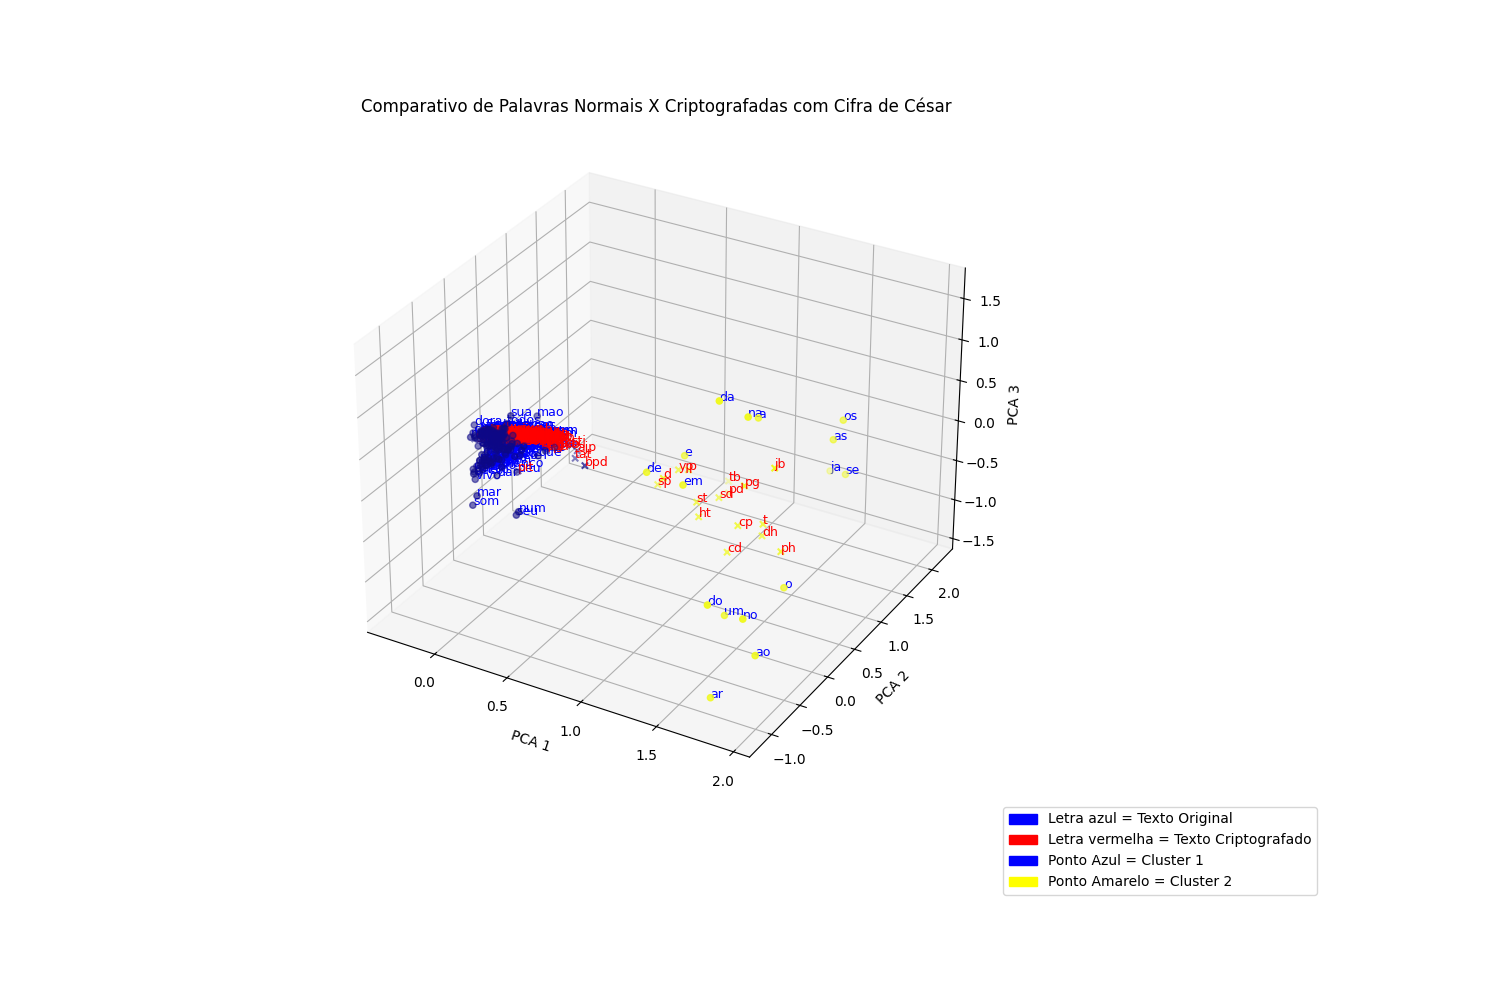

In [12]:
%matplotlib widget
import fasttext
from base_funcoes import *
import numpy as np

amostra = 'paragrafos'
metodo = 'cifra_cesar'
deslocamento = 15
titulo = 'Comparativo de Palavras Normais X Criptografadas com Cifra de César'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes = processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

In [13]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculando distância par a par dos vetores
distancias = pdist(vetores_reduzidos_criptografados)

# Determinando a distância média
distancia_media = np.mean(distancias)

print("Distância média entre cada par de pontos criptografados:", distancia_media)

print(f'Tamanho total das projeções para {amostra} usando {metodo}: ', np.sum(tamanhos_projecoes))

Distância média entre cada par de pontos criptografados: 0.3310272238451718
Tamanho total das projeções para paragrafos usando cifra_cesar:  37.79294420935705


### Primeiros Resultados: Parágrafos Capitães de Areia + Cifra de César com Deslocamento de 15 Unidades

Embora o gráfico dos vetores de palavras originais e criptografadas seja um pouco confuso, podemos extrair as seguintes conclusões:

##### **1. Temos dois grupos significativos de palavras:**

**Primeiro grupo (Pontos Amarelos):** Substantivos e verbos contidos no texto original + Substantivos e verbos criptografadas.

- *Alguns exemplos incluem:* Lugar, redor, vazia, cheia..

**Segundo grupo (Pontos Azuis):** Conectivos, pronomes, preposições + Suas versões criptografadas.

- *Alguns exemplos envolvem:* De, do, eu, na, os, as..

A distinção entre ambos os grupos é realizada por meio de similaridades semânticas e pela composição geral das palavras no caso do texto original. O modelo pré-treinado não é capaz de inferir o significado das palavras criptografadas, considerando que essas não possuem significado intrínseco. Portanto, a busca por semelhanças é efetuada com base nas subpalavras que as compõem, conforme o funcionamento do modelo FastText.

##### **2. Número de caracteres faz parte da proximidade entre as palavras.**

Ao analisarmos as palavras, tanto normais quanto criptografadas, observamos que aquelas com quantidades semelhantes de caracteres tendem a ser posicionadas próximas umas das outras. Isso se torna mais evidente ao analisarmos o segundo grupo, composto por conectivos, pronomes e preposições gerais. Nesses casos, a quantidade de caracteres e a ordem relativa deles nas palavras influenciam significativamente nessa subdivisão entre os dois clusters.

##### **3. Distância de média dos pontos criptografados entre si de $0.3$ a $0.4$ aproximadamente.**

A distância média registrada para cada par de pontos de palavras criptografadas foi de $0.3$ que se trata de um valor mediano se considerarmos a escala em que estamos lidando. Nesse sentido, o tamanho total das projeções dos vetores criptografados sobre o autovetor composto pelas componentes principais foi de 37 que configura um valor alto na escala que estamos trabalhando.

Como veremos posteriormente, ao usar o método de criptografia RSA a distância entre cada par de pontos criptografados tende a ser muito menor em comparação à essa mesma distância ao utilizar o método de Cifra de César. 

##### **4. Deslocamento escolhido de letras não altera significativamente os vetores.**

Independentemente do deslocamento $d$ selecionado para a Cifra de César, o resultado da análise foi bem semelhante, isto é, os pontos tanto normais quanto criptografados formaram dois grupos como eu havia mencionado com comportamentos análogos.

##### **5. Tamanho Médio das Projeções foi Elevado em função da Variância apresentada pelos Pontos:**

Como os pontos criptografados apresentaram um comportamento mais disperso e menos concentrado, a projeção desses pontos com relação às componentes principais foi consideravelmente mais elevado.

#### Conclusão

Concluímos que, após a aplicação do mecanismo de criptografia de Cifra de César, independentemente do nível de deslocamento, as palavras criptografadas são deslocadas de forma uniforme, seguindo um padrão claramente distinto entre substantivos, verbos e do outro lado, pronomes, preposições, conjunções. Portanto, é plausível considerarmos uma função reversível e bijetora $f(c_i) \to \phi$ em que $\phi$ representa o vetor da palavra original e $c_i$ corresponderia à palavra criptografada

### Visualização dos resultados: Parágrafos Capitães de Areia + RSA com Semente 1024

Agora vamos analisar os resultados obtidos para cada amostra, começando com o poema de Vinicius de Moraes e a aplicação da **Cifra de César simples** como forma de criptografia:


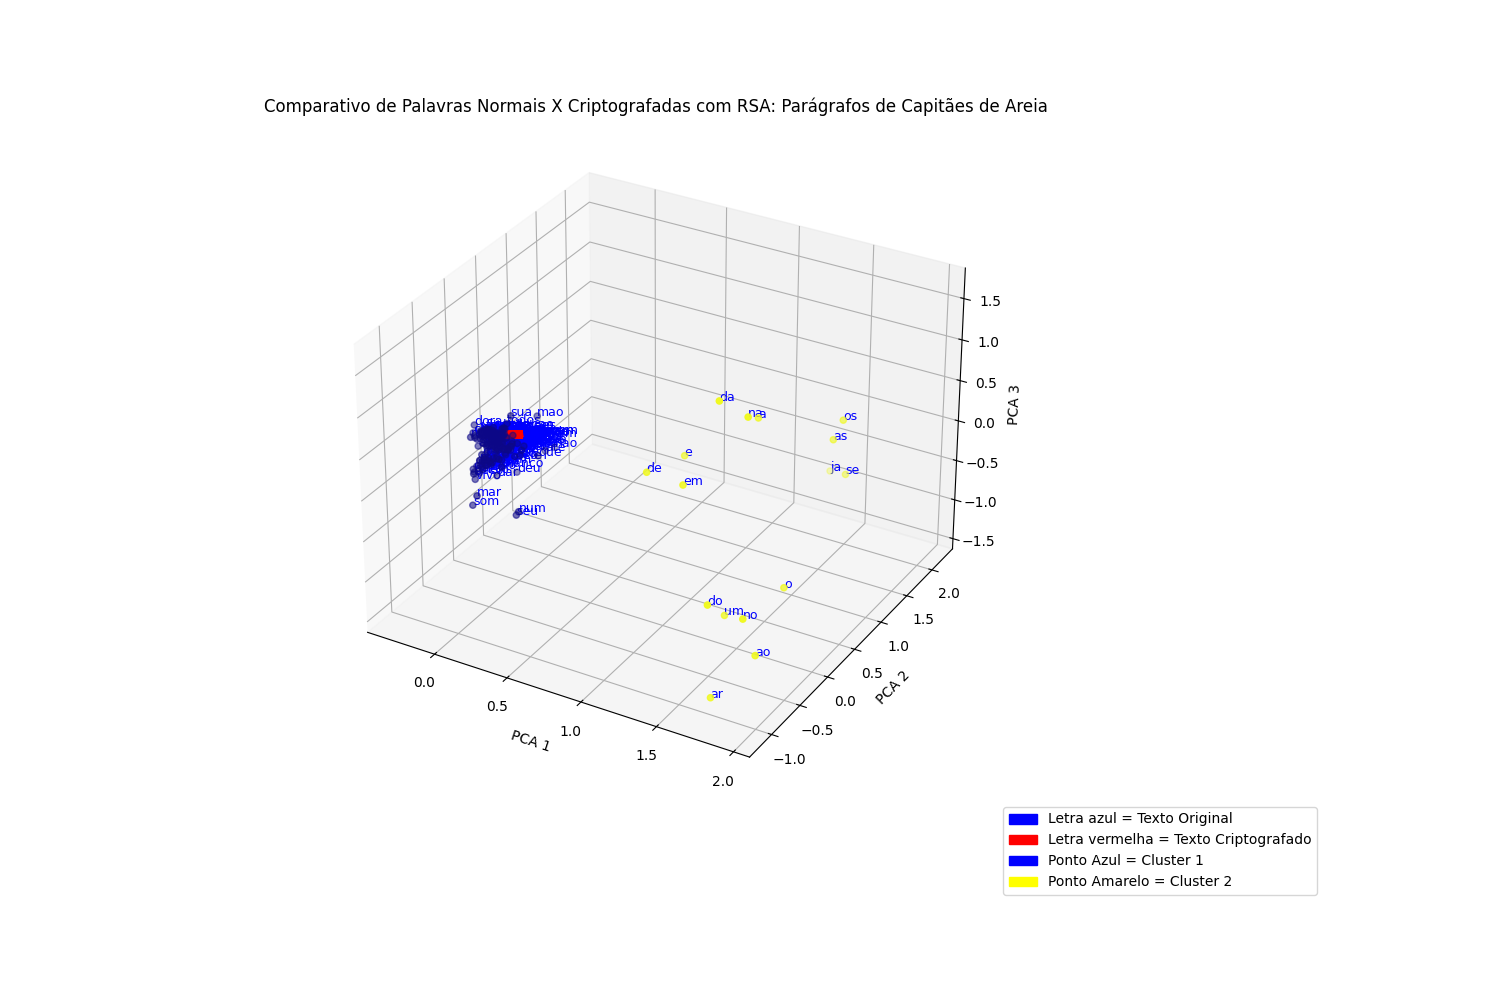

In [2]:
%matplotlib widget
import fasttext
from base_funcoes import *

amostra = 'paragrafos'
metodo = 'rsa'
deslocamento = 0
titulo = 'Comparativo de Palavras Normais X Criptografadas com RSA: Parágrafos de Capitães de Areia'

vetores_reduzidos_originais_rsa, vetores_reduzidos_criptografados_rsa, tamanhos_projecoes_rsa = processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

In [3]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculando distância par a par dos vetores
distancias = pdist(vetores_reduzidos_criptografados_rsa)

# Determinando a distância média
distancia_media = np.mean(distancias)

print("Distância média entre cada par de pontos criptografados:", distancia_media)

print(f'Tamanho total das projeções dos vetores criptografados no plano principal para {amostra} usando {metodo}: ', np.sum(tamanhos_projecoes_rsa))

Distância média entre cada par de pontos criptografados: 0.00503577999371157
Tamanho total das projeções dos vetores criptografados no plano principal para paragrafos usando rsa:  5.216097223626851


### Primeiros Resultados: Parágrafos Capitães de Areia + RSA com Semente 1024

Embora o gráfico dos vetores de palavras originais e criptografadas continue um pouco confuso, conseguimos claramente perceber resultados distintos:

*Obs.* Para facilitar a análise, nomeei os pontos criptografados com RSA de $c_1$ até $c_n$, tendo em vista que a palavra ao ser criptografada com RSA acaba sendo desproporcionalmente longa em comparação 

##### **1. Temos apenas os dois grupos de palavras normais e das criptografadas se tornou um só:**

**Primeiro grupo (Pontos Amarelos):** Substantivos e verbos contidos no texto original + Todas as palavras criptografadas.

- *Alguns exemplos incluem:* Lugar, redor, vazia, cheia..

- *Exemplos de palavras encriptografadas com RSA*: `2da10f6c9dd4abd7ae9840c16783cc346c45f1d68c55caa19ed9ca4a94f2ed325962406c5a1aeec009f78ae0fefdc6505d6730d6711733437356ee5315f4c753f99a311ddd9eb0a52b52a4e443867747a895a7a5862a61a97188b03fda318aba2ebc990dcae2b71a1050d1fd207c9e005a42c31855dce470e8a1b8cbd9f647735de204ae50c8615db31f3191106dc013ad5dc03dde8b94d2129b33d7b2e9a4830474038e71b23393e0fa390ea32f5e8ebca2b25bb04c0f3b51e7640aa888e0bf18ee9ab882e1afbb1787925b0b5b2bfdc72d3ac6e6de29e65a775d534f0559a12d7ff89a5595ff76d8307a0c61c5a4e002fe5ed7b154bbc3a152973315c0`

**Segundo grupo (Pontos Azuis):** Conectivos, pronomes, preposições + Nenhuma contraparte criptografada.

- *Alguns exemplos envolvem:* De, do, eu, na, os, as..

##### **2. Número de caracteres faz parte da proximidade entre as palavras.**

Como podemos analisar palavras, tanto normais quanto criptografadas, que possuem quantidades semelhantes de caracteres estão posicionadas perto entre si.

##### **3. Distância de média dos pontos criptografados entre si de $0.3$ a $0.4$ aproximadamente.**

Como veremos posteriormente, ao usar o método de criptografia RSA a distância tende a ser muito menor, apro

##### **4. Deslocamento escolhido de letras não altera significativamente os vetores.**

#### Conclusão

Concluímos que, após a aplicação do mecanismo de criptografia de RSA, as palavras criptografadas formam um núcleo 

independentemente do nível de deslocamento, as palavras criptografadas são deslocadas de forma uniforme, seguindo um padrão claramente distinto entre substantivos, verbos e do outro lado, pronomes, preposições, conjunções. Portanto, é plausível considerarmos uma função reversível e bijetora $f(c_i) \to \phi$ em que $\phi$ representa o vetor da palavra original e $c_i$ corresponderia à palavra criptografada


### Analisando outros Textos

Após analisarmos esse trecho de Capitães de Areia, vamos verificar os resultados obtidos com outros textos



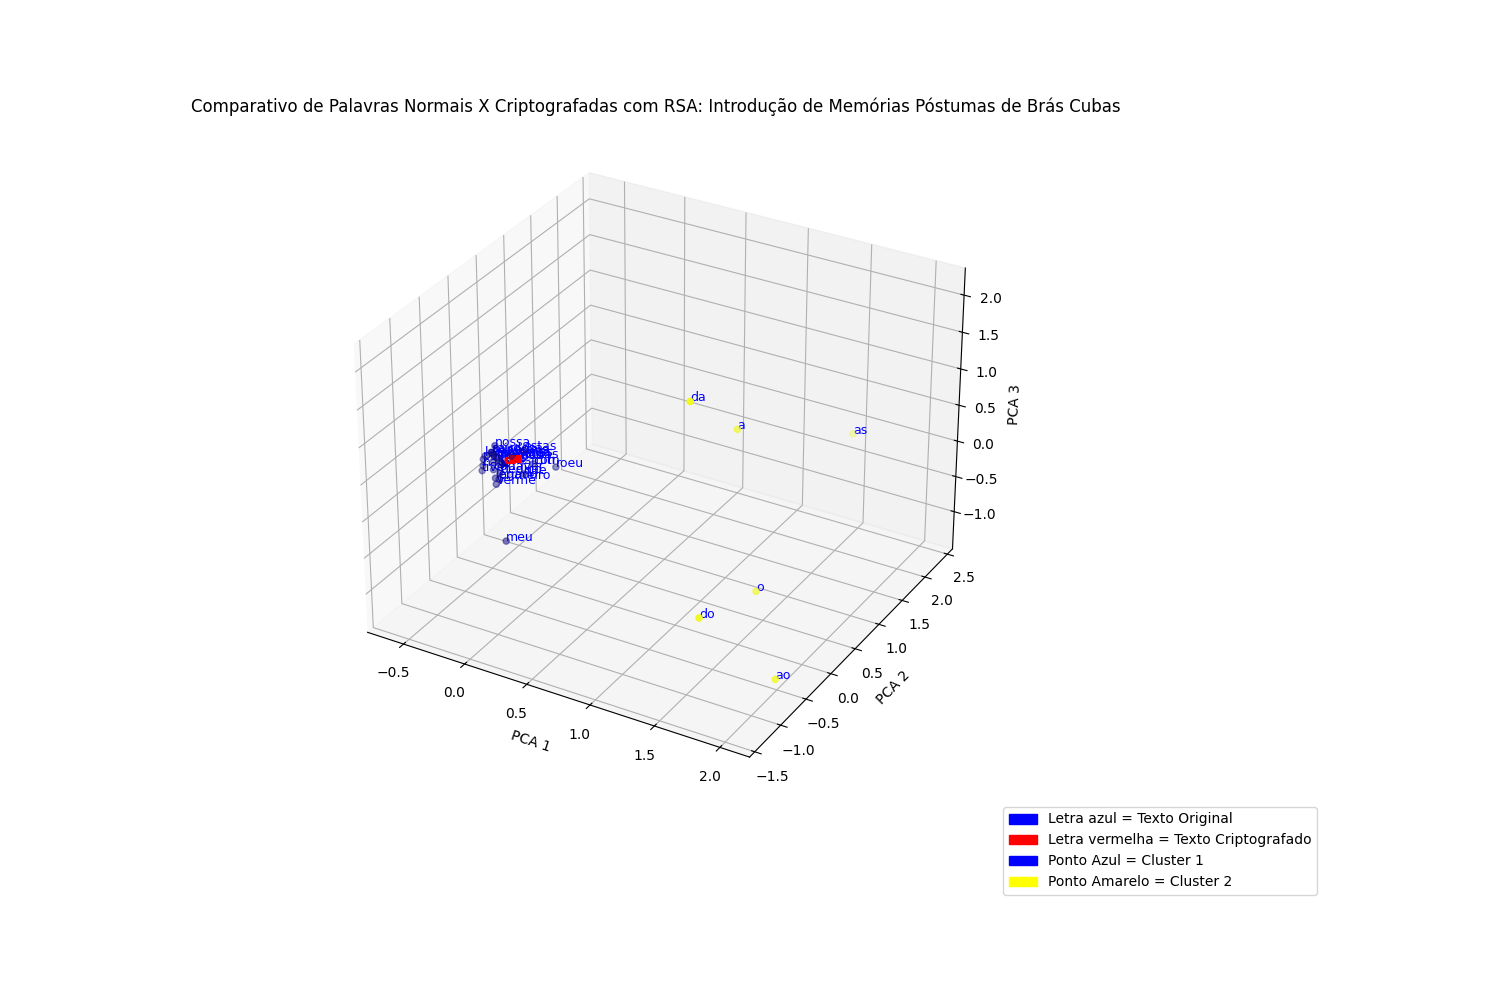

Tamanho total das projeções dos vetores criptografados no plano principal para memorias usando rsa:  0.7424213543393203
30


In [7]:
%matplotlib widget
import fasttext
from base_funcoes import *

amostra = 'memorias'
metodo = 'rsa'
deslocamento = 0
titulo = 'Comparativo de Palavras Normais X Criptografadas com RSA: Introdução de Memórias Póstumas de Brás Cubas'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes_memorias = processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

print(f'Tamanho total das projeções dos vetores criptografados no plano principal para {amostra} usando {metodo}: ', np.sum(tamanhos_projecoes_memorias))

print(len(vetores_reduzidos_originais))

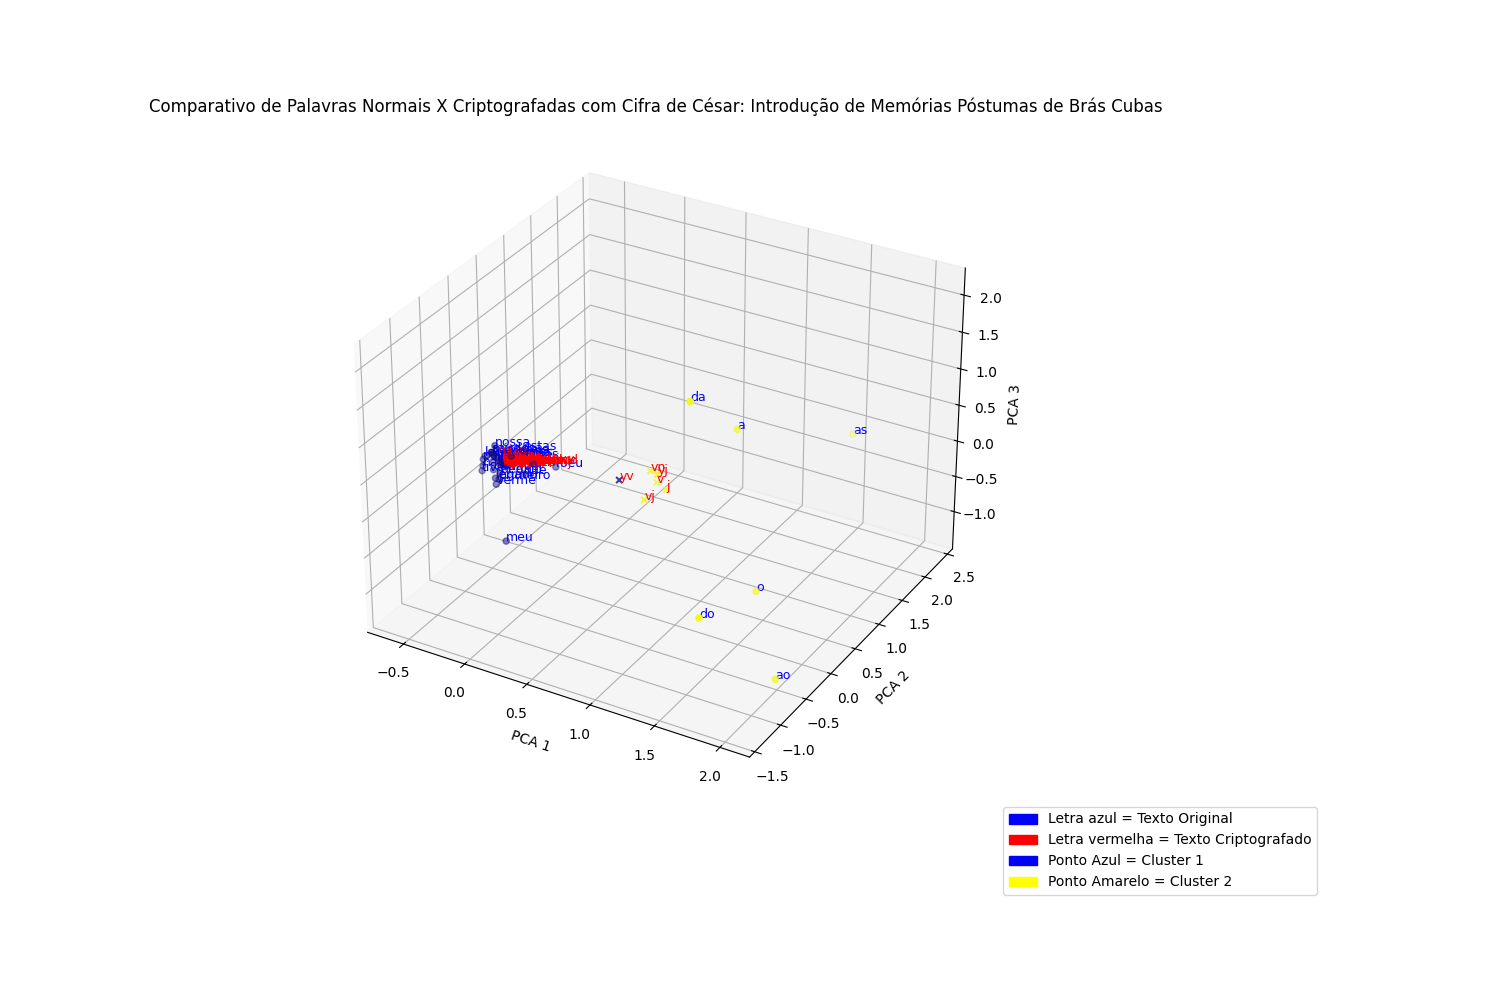

Tamanho total das projeções dos vetores criptografados no plano principal para memorias usando cifra_cesar:  8.106804013808452
30


In [8]:
%matplotlib widget
import fasttext
from base_funcoes import *

amostra = 'memorias'
metodo = 'cifra_cesar'
deslocamento = 21
titulo = 'Comparativo de Palavras Normais X Criptografadas com Cifra de César: Introdução de Memórias Póstumas de Brás Cubas'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes_memorias = processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

print(f'Tamanho total das projeções dos vetores criptografados no plano principal para {amostra} usando {metodo}: ', np.sum(tamanhos_projecoes_memorias))

print(len(vetores_reduzidos_originais))

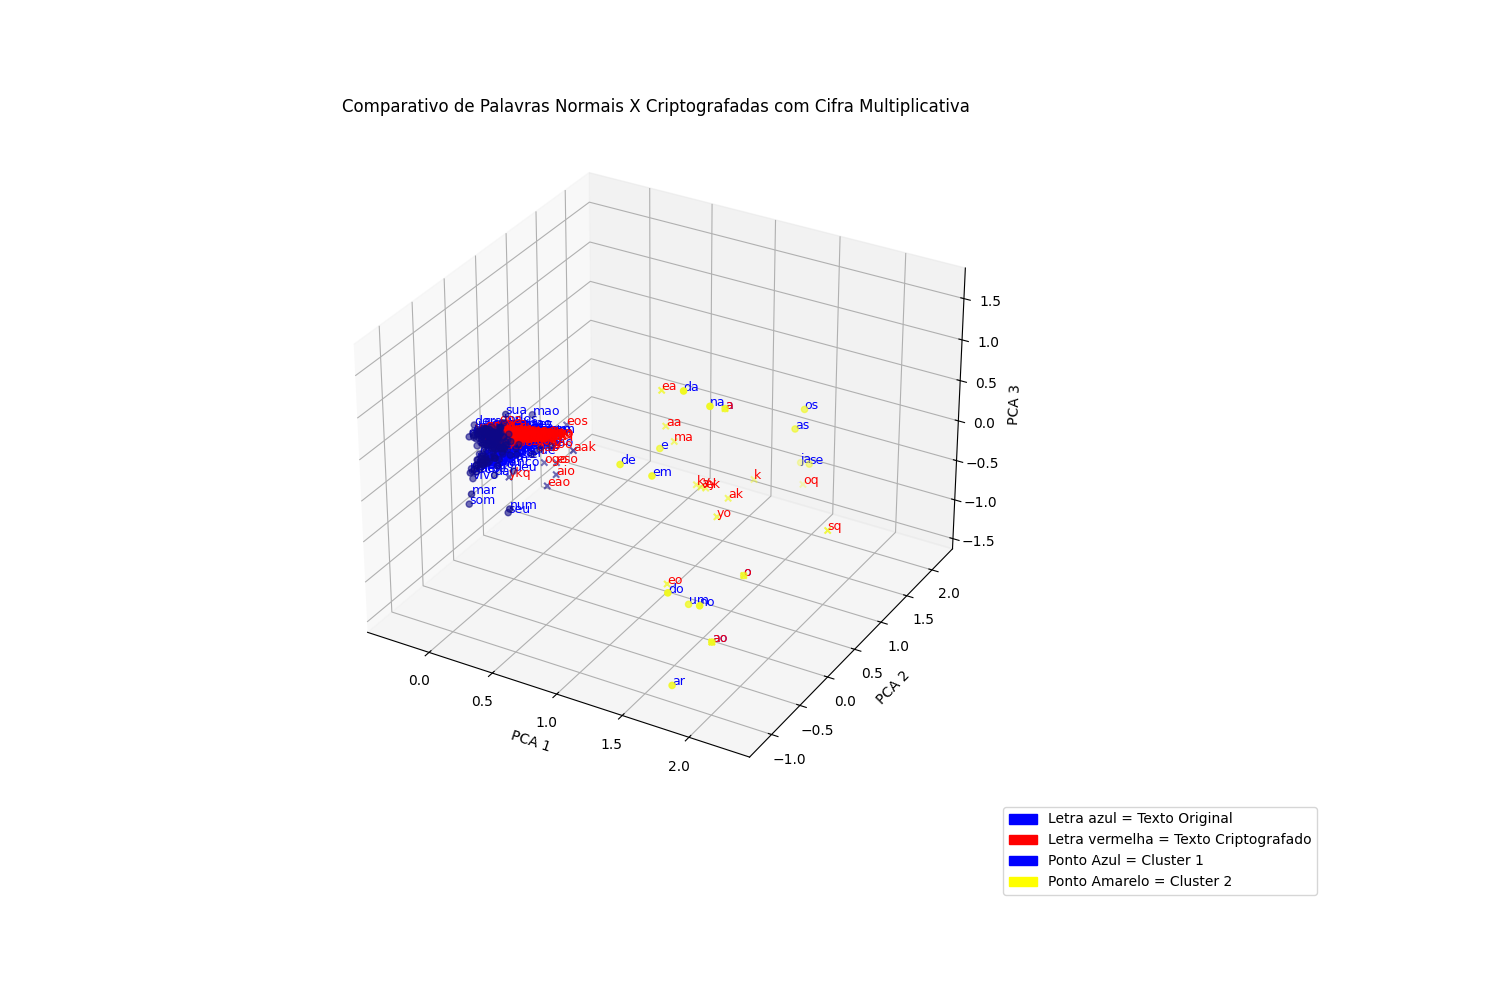

In [15]:
%matplotlib widget
import fasttext
from base_funcoes import *
import numpy as np

amostra = 'paragrafos'
metodo = 'cifra_multiplicativa'
deslocamento = 10
titulo = 'Comparativo de Palavras Normais X Criptografadas com Cifra Multiplicativa'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes = processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)


In [16]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculando distância par a par dos vetores
distancias = pdist(vetores_reduzidos_criptografados)

# Determinando a distância média
distancia_media = np.mean(distancias)

print("Distância média entre cada par de pontos criptografados:", distancia_media)

print(f'Tamanho total das projeções para {amostra} usando {metodo}: ', np.sum(tamanhos_projecoes))

Distância média entre cada par de pontos criptografados: 0.3741144166683811
Tamanho total das projeções para paragrafos usando cifra_multiplicativa:  40.71537208821029


### Analisando em Duas Dimensões

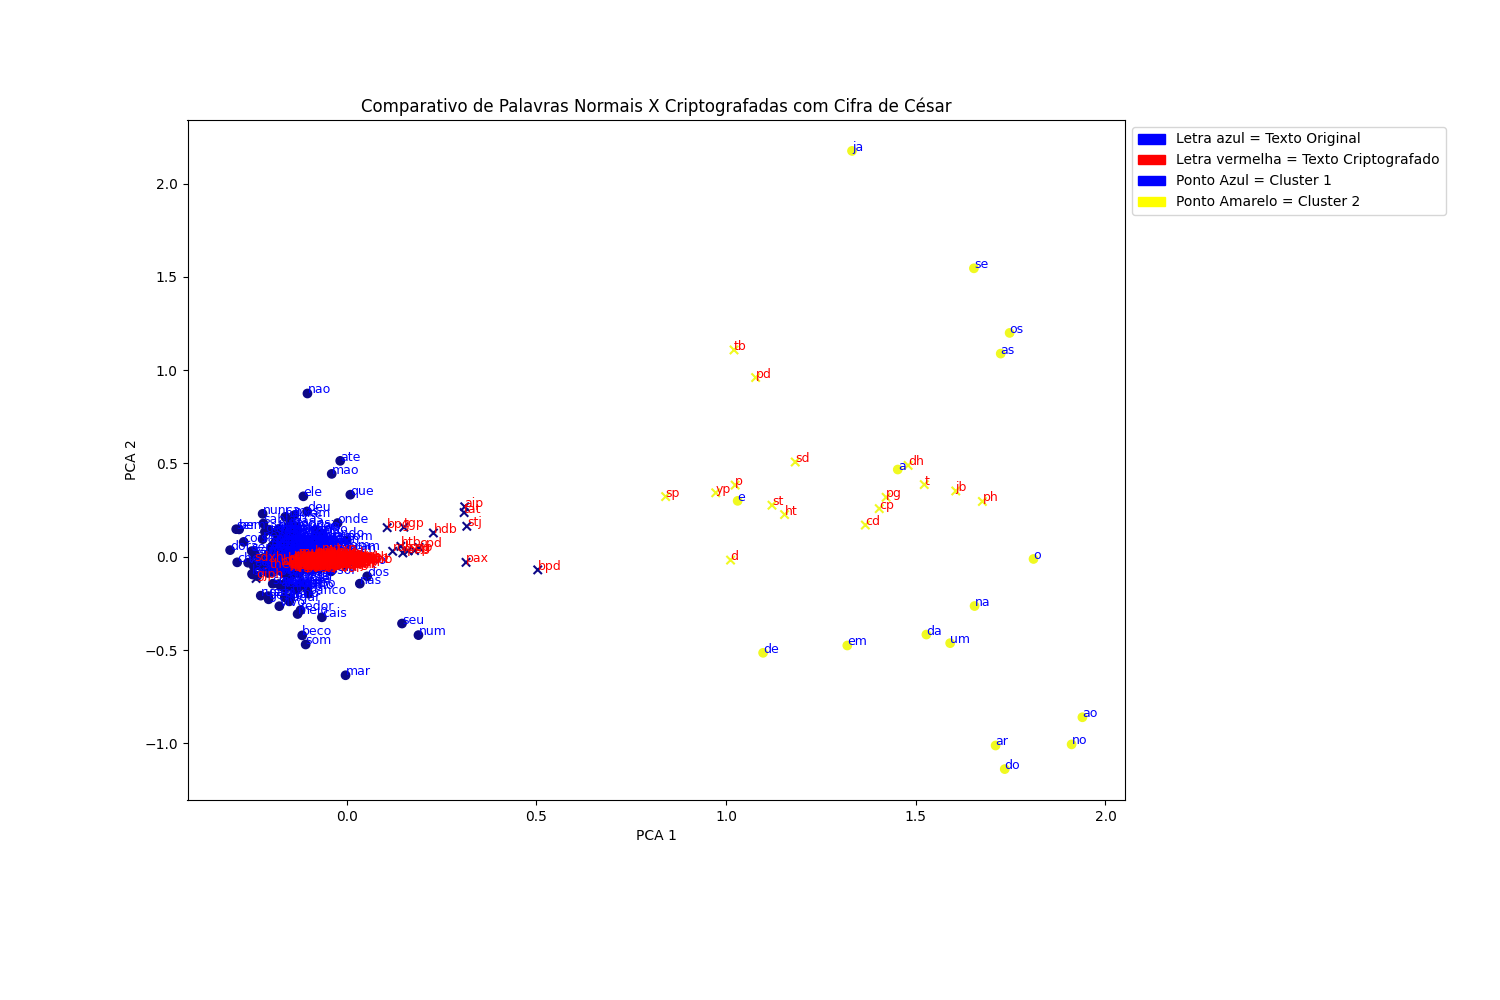

In [17]:
%matplotlib widget
import fasttext
from base_funcoes import *
import numpy as np

amostra = 'paragrafos'
metodo = 'cifra_cesar'
deslocamento = 15
titulo = 'Comparativo de Palavras Normais X Criptografadas com Cifra de César'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes = processamento_plotting_2d(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

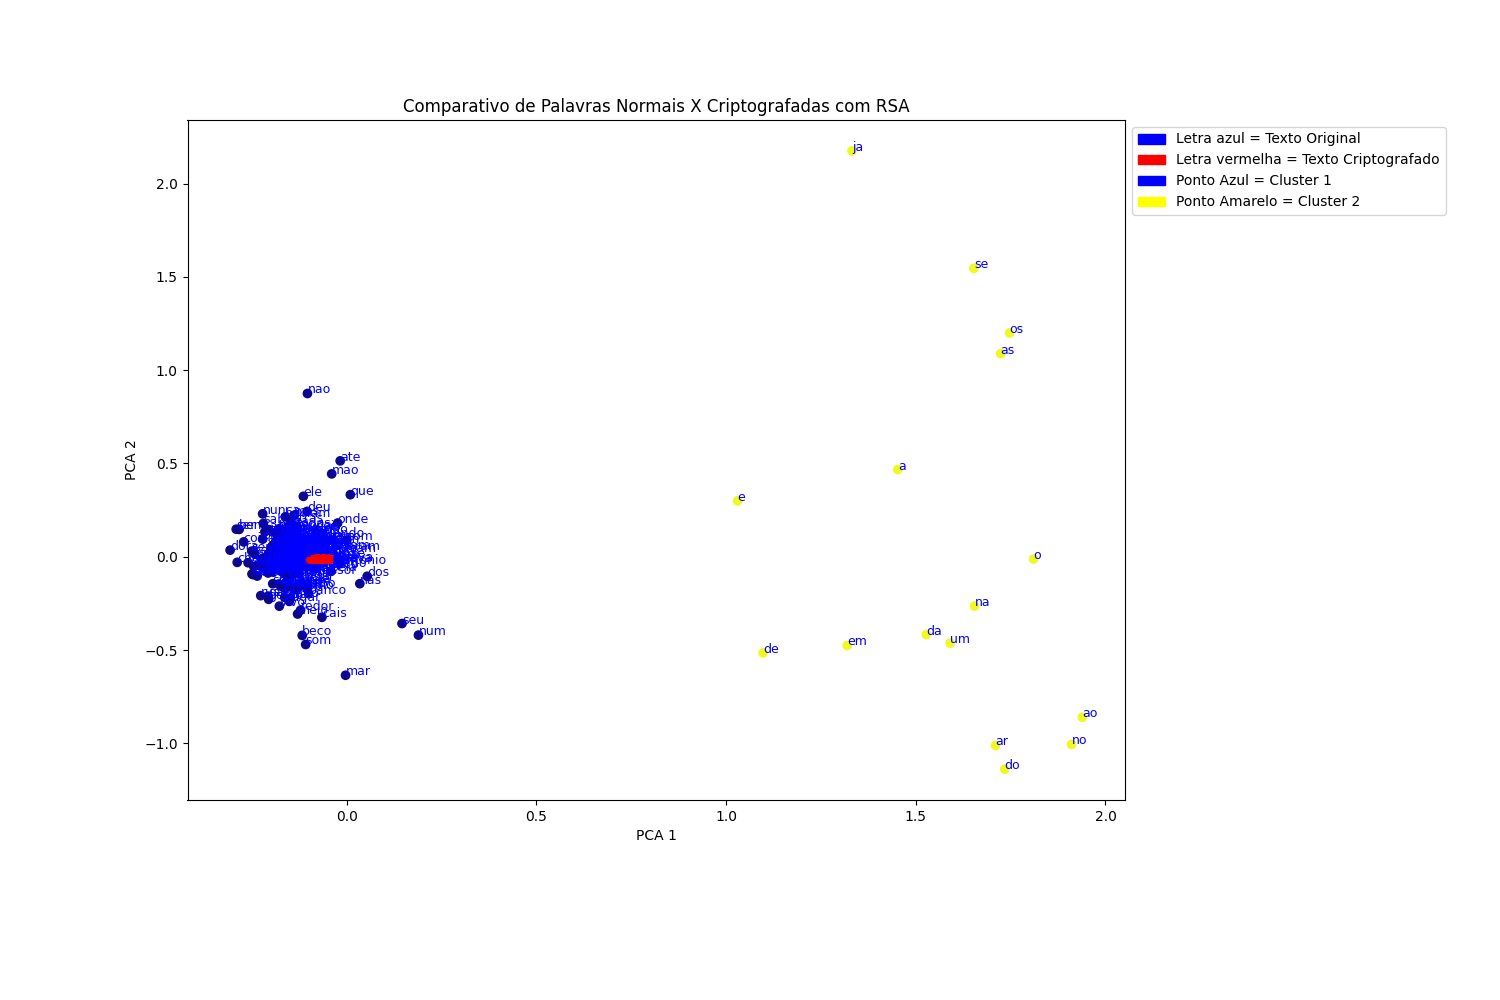

In [18]:
%matplotlib widget
import fasttext
from base_funcoes import *
import numpy as np

amostra = 'paragrafos'
metodo = 'rsa'
deslocamento = 0
titulo = 'Comparativo de Palavras Normais X Criptografadas com RSA'

vetores_reduzidos_originais, vetores_reduzidos_criptografados, tamanhos_projecoes = processamento_plotting_2d(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

### Conclusões para as outras Amostras

Para simplificar essa última análise de outras amostras, vou dividir em dois grupos:

Os textos alternativos apresentaram um comportamento semelhante ao dos parágrafos de "Capitães de Areia", exceto no caso do segundo grupo de palavras, compostos por conectivos e preposições. Esse último conjunto exibiu um comportamento de "outlier", com vetores bastante dispersos entre si maneira geral.

Por fim, o resultado obtido em duas dimensões é essencialmente idêntico ao de três dimensões, porém conseguimos visualizar com mais facilidade as relações entre os pontos criptografados e normais.



## Conclusão Geral

Ao compararmos os vetores resultantes dos dois tipos de criptografia, observamos o seguinte:

1. O método de Cifra de César apresenta um comportamento mais previsível, separando claramente as palavras originais e criptografadas em seus respectivos grupos. A distância média par a par dos pontos criptografados variou entre 0,4 a 0,7.

2. Por outro lado, o método RSA praticamente agrupa todas as palavras originais em um mesmo conjunto na análise de componentes principais. Os vetores de palavras criptografadas pelo RSA apresentam valores de componentes principais bastante parecidos entre si. Esse comportamento assemelha-se ao de uma matriz que reduz a dimensionalidade dos vetores no seu domínio. 

Essas observações corroboram a ideia de que a função de reversão $f(c_i) \to \phi$ é menos plausível de ser obtida para o caso da criptografia usando RSA, embora não seja impossível. Chegamos a essa conclusão com base na análise da distância média no subespaço $\Bbb{R}³$, bem como o tamanho das projeções dos vetores de palavras criptografadas sobre as componentes principais. Portanto, isso nos dá mais indícios de que o método de criptografia RSA é consideravalmente mais robusto e eficaz que a Cifra de César.

*Observação.* É possível reverter um texto criptografado por RSA.